In [1]:
import pandas as pd
import operator as op
import xml.etree.ElementTree as et
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,8.27)})
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [2]:
def parse_XML(xml_file, df_cols): 
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [3]:

def XMLToCSV(xml_file, df_cols):
    cols = df_cols
    rows = []
    
    # Parsing the XML file
    xmlparse = et.parse(xml_file)
    root = xmlparse.getroot()
    for i in root:
        state = i.find("STATE").text
        distrivt = i.find("DISTRICT").text
        market = i.find("MARKET").text
        commodity = i.find("COMMODITY").text
        Variety = i.find("VARIETY").text
        Arrival_Date = i.find("ARRIVAL_DATE").text
        Min_x0020_Price = i.find("MIN_PRICE").text
        Max_x0020_Price = i.find("MAX_PRICE").text
        Modal_x0020_Price = i.find("MODAL_PRICE").text
   
        rows.append({cols[0]: state,
    				cols[1]: distrivt,
    				cols[2]: market,
    				cols[3]: commodity,
                    cols[4]: Variety,
                    cols[5]: Arrival_Date,
                    cols[6]: Min_x0020_Price,
                    cols[7]: Max_x0020_Price,
    				cols[8]: Modal_x0020_Price,})
    
    df = pd.DataFrame(rows, columns=cols)
    
    # Writing dataframe to csv
    df.to_csv('output.csv')
    
    
    


In [4]:
# onioncol=['State','District','Market','Commodity','Variety','Arrival_Date','Min_x0020_Price','Max_x0020_Price','Modal_x0020_Price']
# XMLToCSV('onion/newdata/datafile.xml',onioncol)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
onion_producing_states=["Maharashtra", "Madhya Pradesh", "Karnataka", "Gujarat", "Rajasthan", "Andhra Pradesh", "Haryana", "West Bengal", "Uttar Pradesh", "Chattisgarh", "Jharkhand","Telangana"]
onion_maturity_days=np.arange(100,176)
onion_non_harv_months=['06','07','08']
# drought_sates=[["Maharashtra","Karnataka","Andhra Pradesh","Uttar Pradesh"],["Kerala","Rajasthan","Madhya Pradesh","Karnataka","Uttrakhand","Uttar Pradesh","Andhra Pradesh"]]

In [7]:
onion_xml=['id','State','District','Market','Commodity','Variety','Arrival_Date','Min_x0020_Price','Max_x0020_Price','Modal_x0020_Price']
data=pd.read_csv('onion/Onion_2019.csv')
data2=parse_XML('onion//Onion_2017.xml',onion_xml)
data3=pd.read_csv('onion/newdata/Onion_2020.csv')
data4=pd.read_csv('onion/newdata/Onion_2021.csv')
data5=pd.read_csv('onion/newdata/Onion_2022.csv')
data6=pd.read_csv('onion/newdata/Onion_2023.csv')

data2=data2.drop('id',axis=1)

In [8]:
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0
...,...,...,...,...,...,...,...,...,...
115501,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,03/08/2019,2200,2300,2250.0
115502,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,04/08/2019,2200,2300,2250.0
115503,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,05/08/2019,2200,2300,2250.0
115504,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,06/08/2019,2200,2300,2250.0


In [9]:
data2

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,02/01/2017,4000,6000,5000
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,03/01/2017,4000,6000,5000
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,04/01/2017,4000,6000,5000
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,01/02/2017,4000,6000,5000
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,02/02/2017,4000,6000,5000
...,...,...,...,...,...,...,...,...,...
115348,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,10/09/2017,2700,2900,2800
115349,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,11/09/2017,2700,2900,2800
115350,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,12/09/2017,2700,2900,2800
115351,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,13/09/2017,2700,2900,2800


In [10]:
data3

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,06-01-2020,800,1800,1400
1,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,07-01-2020,800,1600,1300
2,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,09-01-2020,600,1700,1250
3,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,10-01-2020,600,1500,1100
4,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,11-01-2020,800,1500,1250
...,...,...,...,...,...,...,...,...,...
3219,Telangana,Hyderabad,Gudimalkapur,Onion Green,Onion Green,17-10-2020,1600,2000,1800
3220,Telangana,Hyderabad,Gudimalkapur,Onion Green,Onion Green,18-10-2020,1600,2000,1800
3221,Telangana,Hyderabad,Gudimalkapur,Onion Green,Onion Green,19-10-2020,1600,2000,1800
3222,Telangana,Hyderabad,Gudimalkapur,Onion Green,Onion Green,21-10-2020,1600,2000,1800


In [11]:
data4

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,04-01-2021,800,1200,1100
1,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,05-01-2021,500,1000,800
2,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,06-01-2021,300,1000,650
3,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,07-01-2021,400,1000,800
4,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,08-01-2021,500,1000,700
...,...,...,...,...,...,...,...,...,...
5371,Telangana,Ranga Reddy,KukatpallyRBZ,Onion Green,Onion Green,27-08-2021,4500,4500,4500
5372,Telangana,Ranga Reddy,KukatpallyRBZ,Onion Green,Onion Green,28-08-2021,4500,4500,4500
5373,Telangana,Ranga Reddy,KukatpallyRBZ,Onion Green,Onion Green,31-08-2021,3500,3500,3500
5374,Telangana,Ranga Reddy,KukatpallyRBZ,Onion Green,Onion Green,02-09-2021,3500,3500,3500


In [12]:
data5

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,29/01/2022,4000.0,7000.0,5000.0
1,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,31/01/2022,4000.0,6000.0,5000.0
2,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,14/03/2022,4000.0,6000.0,5000.0
3,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,15/03/2022,4000.0,6000.0,5000.0
4,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,16/03/2022,4000.0,6000.0,5000.0
...,...,...,...,...,...,...,...,...,...
201919,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,26/12/2022,2650.0,2750.0,2700.0
201920,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,27/12/2022,2650.0,2750.0,2700.0
201921,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,28/12/2022,2650.0,2750.0,2700.0
201922,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,29/12/2022,2650.0,2750.0,2700.0


In [13]:
data6

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,06-01-2023,6000.0,6000.0,6000.0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,09-01-2023,6000.0,6000.0,6000.0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13-01-2023,6000.0,6000.0,6000.0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,20-01-2023,6000.0,6000.0,6000.0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,23-01-2023,6000.0,6000.0,6000.0
...,...,...,...,...,...,...,...,...,...
13544,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,18-01-2023,2250.0,2350.0,2300.0
13545,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,19-01-2023,2200.0,2300.0,2250.0
13546,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,20-01-2023,2200.0,2300.0,2250.0
13547,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,23-01-2023,2600.0,2700.0,2650.0


In [14]:
data2.groupby('Modal_x0020_Price')['Modal_x0020_Price'].agg('count')

Modal_x0020_Price
10          4
100        26
1000     6484
10000      66
1001        2
         ... 
995        16
9950        2
996         1
997         1
999         1
Name: Modal_x0020_Price, Length: 1524, dtype: int64

In [15]:
# ndata=data.drop(data.Price[data.Price<10],axis=1)
# ndata

In [16]:
# data[data.Modal_x0020_Price<10].agg('count')

In [17]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         13549 non-null  object 
 1   district      13549 non-null  object 
 2   market        13549 non-null  object 
 3   commodity     13549 non-null  object 
 4   variety       13549 non-null  object 
 5   arrival_date  13549 non-null  object 
 6   min_price     13547 non-null  float64
 7   max_price     13507 non-null  float64
 8   modal_price   13549 non-null  float64
dtypes: float64(3), object(6)
memory usage: 952.8+ KB


In [18]:
data.columns=data2.columns
data3.columns=data2.columns
data4.columns=data2.columns
data5.columns=data2.columns
data6.columns=data2.columns
data6

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,06-01-2023,6000.0,6000.0,6000.0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,09-01-2023,6000.0,6000.0,6000.0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13-01-2023,6000.0,6000.0,6000.0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,20-01-2023,6000.0,6000.0,6000.0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,23-01-2023,6000.0,6000.0,6000.0
...,...,...,...,...,...,...,...,...,...
13544,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,18-01-2023,2250.0,2350.0,2300.0
13545,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,19-01-2023,2200.0,2300.0,2250.0
13546,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,20-01-2023,2200.0,2300.0,2250.0
13547,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,23-01-2023,2600.0,2700.0,2650.0


In [19]:
onion_producing_states3=["Maharashtra", "Gujarat", "Rajasthan",  "Haryana", "Telangana"]

data3.groupby('State')['State'].agg('count')

State
Gujarat              822
Haryana              206
Himachal Pradesh      49
Maharashtra         1430
Odisha                 1
Punjab               481
Rajasthan              1
Telangana            234
Name: State, dtype: int64

In [20]:
onion_producing_states4=["Maharashtra", "Madhya Pradesh",  "Gujarat", "Haryana", "Telangana"]
data4.groupby('State')['State'].agg('count')

State
Gujarat             1329
Haryana              117
Himachal Pradesh     129
Madhya Pradesh         1
Maharashtra         2419
Odisha                 2
Punjab               794
Telangana            585
Name: State, dtype: int64

In [21]:
onion_producing_states6=["Maharashtra", "Madhya Pradesh", "Karnataka", "Gujarat", "Rajasthan", "Andhra Pradesh", "Haryana", "West Bengal", "Uttar Pradesh", "Chattisgarh","Telangana"]

data6.groupby('State')['State'].agg('count')

State
Andaman and Nicobar       5
Andhra Pradesh           36
Bihar                   897
Chandigarh               14
Chattisgarh              83
Goa                      20
Gujarat                 375
Haryana                 945
Himachal Pradesh        334
Jammu and Kashmir        98
Karnataka               351
Kerala                 1352
Madhya Pradesh          805
Maharashtra             759
Manipur                  63
NCT of Delhi             54
Nagaland                  2
Odisha                  514
Punjab                  961
Rajasthan               569
Telangana               204
Tripura                 151
Uttar Pradesh          3621
Uttrakhand              206
West Bengal            1130
Name: State, dtype: int64

In [22]:
coldata=[data,data2,data5]
coldata2=[data3,data4,data6]
for datas in coldata:
    datas['Month']=datas['Arrival_Date'].str.split('/',expand=True)[1]

    
for datas in coldata2:
    datas['Month']=datas['Arrival_Date'].str.split('-',expand=True)[1]


# sd=[0]*4
# se=[0]*7

# i=0
    
# le=LabelEncoder()
# x=le.fit_transform(data['State'])
# sd=le.transform(drought_sates[0])
# y=le.fit_transform(data2['State'])
# se=le.transform(drought_sates[1])
# sd

In [23]:
data5.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month
0,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,29/01/2022,4000.0,7000.0,5000.0,01
1,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,31/01/2022,4000.0,6000.0,5000.0,01
2,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,14/03/2022,4000.0,6000.0,5000.0,03
3,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,15/03/2022,4000.0,6000.0,5000.0,03
4,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,16/03/2022,4000.0,6000.0,5000.0,03


In [24]:
i=0
rows,cols=(3,12)
sc=[[0]*cols]*rows
op3=[[0]*5]
op4=[[0]*5]
op6=[[0]*11]
le=LabelEncoder()
for datas in coldata:
    datas['State_code']=le.fit_transform(datas['State'])
    sc[i]=le.transform(onion_producing_states)
    i=i+1
    datas['Price']=datas['Modal_x0020_Price'].apply(pd.to_numeric).div(100)
# i=0
for datas in coldata2:
    datas['State_code']=le.fit_transform(datas['State'])
    if i==3:
         op3=le.transform(onion_producing_states3)
    if i==4:
         op4=le.transform(onion_producing_states4)
    if i==5:
         op6=le.transform(onion_producing_states6)        
    i=i+1
    datas['Price']=datas['Modal_x0020_Price'].apply(pd.to_numeric).div(100)    

In [25]:
sc=np.vstack(sc)

In [26]:
sc,op3,op4,op6

(array([[14, 13, 11,  6, 22,  1,  7, 27, 25,  4, 10, 23],
        [15, 14, 12,  7, 22,  1,  8, 27, 25,  5, 11, 23],
        [15, 14, 12,  7, 22,  1,  8, 27, 25,  5, 11, 23]]),
 array([3, 0, 6, 1, 7]),
 array([4, 3, 0, 1, 7]),
 array([13, 12, 10,  6, 19,  1,  7, 24, 22,  4, 20]))

In [27]:
for datas in coldata:
    datas['Producing']=0
    datas['Harvesting Month']=1
    
    
for datas in coldata2:
    datas['Producing']=0
    datas['Harvesting Month']=1
   

data4.head(10)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,04-01-2021,800,1200,1100,01,0,11.0,0,1
1,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,05-01-2021,500,1000,800,01,0,8.0,0,1
2,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,06-01-2021,300,1000,650,01,0,6.5,0,1
3,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,07-01-2021,400,1000,800,01,0,8.0,0,1
4,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,08-01-2021,500,1000,700,01,0,7.0,0,1
5,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,09-01-2021,500,900,750,01,0,7.5,0,1
6,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,11-01-2021,500,700,650,01,0,6.5,0,1
7,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,12-01-2021,700,1000,900,01,0,9.0,0,1
8,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,13-01-2021,500,1000,800,01,0,8.0,0,1
9,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,15-01-2021,600,1000,850,01,0,8.5,0,1


In [28]:
x=data.values

for i in range(len(x)):
    for j in np.arange(0,12):
        if x[i,10]==sc[0,j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0

dataset=pd.DataFrame(x,columns=data.columns)

In [29]:
x=data2.values

for i in range(len(x)):
    for j in range(12):
        if x[i,10]==sc[1,j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0


dataset2=pd.DataFrame(x,columns=data.columns)

In [30]:
x=data3.values

for i in range(len(x)):
    for j in range(5):
        if x[i,10]==op3[j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0


dataset3=pd.DataFrame(x,columns=data.columns)

In [31]:
x=data4.values

for i in range(len(x)):
    for j in range(5):
        if x[i,10]==op4[j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0


dataset4=pd.DataFrame(x,columns=data.columns)

In [32]:
x=data5.values

for i in range(len(x)):
    for j in range(12):
        if x[i,10]==sc[2,j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0


dataset5=pd.DataFrame(x,columns=data.columns)

In [33]:
x=data6.values

for i in range(len(x)):
    for j in range(11):
        if x[i,10]==op6[j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0


dataset6=pd.DataFrame(x,columns=data.columns)

In [34]:
dataset.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0,06,0,80.0,0,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0,06,0,80.0,0,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0,06,0,80.0,0,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0,06,0,80.0,0,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0,06,0,60.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,08/05/2019,620,1050,840.0,05,1,8.4,1,1
96,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,09/05/2019,930,940,940.0,05,1,9.4,1,1
97,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/05/2019,590,870,620.0,05,1,6.2,1,1
98,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,11/05/2019,460,700,670.0,05,1,6.7,1,1


In [35]:
dataset2.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,02/01/2017,4000,6000,5000,01,0,50.0,0,1
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,03/01/2017,4000,6000,5000,01,0,50.0,0,1
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,04/01/2017,4000,6000,5000,01,0,50.0,0,1
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,01/02/2017,4000,6000,5000,02,0,50.0,0,1
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,02/02/2017,4000,6000,5000,02,0,50.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Andhra Pradesh,Cuddapah,Jammalamadugu,Onion,Onion,24/01/2017,750,850,800,01,1,8.0,1,1
96,Andhra Pradesh,Cuddapah,Jammalamadugu,Onion,Onion,27/01/2017,750,850,800,01,1,8.0,1,1
97,Andhra Pradesh,Cuddapah,Jammalamadugu,Onion,Onion,28/01/2017,750,850,800,01,1,8.0,1,1
98,Andhra Pradesh,Cuddapah,Jammalamadugu,Onion,Onion,29/01/2017,750,850,800,01,1,8.0,1,1


In [36]:
dataset3.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,06-01-2020,800,1800,1400,01,0,14.0,1,1
1,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,07-01-2020,800,1600,1300,01,0,13.0,1,1
2,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,09-01-2020,600,1700,1250,01,0,12.5,1,1
3,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,10-01-2020,600,1500,1100,01,0,11.0,1,1
4,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,11-01-2020,800,1500,1250,01,0,12.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gujarat,Banaskanth,Deesa(Deesa Veg Yard),Onion Green,Other,25-07-2020,1500,1750,1625,07,0,16.25,1,0
96,Gujarat,Banaskanth,Deesa(Deesa Veg Yard),Onion Green,Other,27-07-2020,1500,1800,1650,07,0,16.5,1,0
97,Gujarat,Banaskanth,Deesa(Deesa Veg Yard),Onion Green,Other,28-07-2020,1500,1900,1700,07,0,17.0,1,0
98,Gujarat,Banaskanth,Deesa(Deesa Veg Yard),Onion Green,Other,29-07-2020,1500,1950,1725,07,0,17.25,1,0


In [37]:
dataset4.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,04-01-2021,800,1200,1100,01,0,11.0,1,1
1,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,05-01-2021,500,1000,800,01,0,8.0,1,1
2,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,06-01-2021,300,1000,650,01,0,6.5,1,1
3,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,07-01-2021,400,1000,800,01,0,8.0,1,1
4,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,08-01-2021,500,1000,700,01,0,7.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,06-07-2021,2500,3000,2850,07,0,28.5,1,0
96,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,07-07-2021,1500,4000,3000,07,0,30.0,1,0
97,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,08-07-2021,2000,4200,3250,07,0,32.5,1,0
98,Gujarat,Ahmedabad,Ahmedabad,Onion Green,Other,09-07-2021,1500,3500,2650,07,0,26.5,1,0


In [38]:
dataset5.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,29/01/2022,4000.0,7000.0,5000.0,01,0,50.0,0,1
1,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,31/01/2022,4000.0,6000.0,5000.0,01,0,50.0,0,1
2,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,14/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
3,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,15/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
4,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,16/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/04/2022,617.0,1351.0,951.0,04,1,9.51,1,1
96,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/04/2022,358.0,1425.0,928.0,04,1,9.28,1,1
97,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/04/2022,405.0,1267.0,830.0,04,1,8.3,1,1
98,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,08/04/2022,317.0,1269.0,829.0,04,1,8.29,1,1


In [39]:
dataset6.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,06-01-2023,6000.0,6000.0,6000.0,01,0,60.0,0,1
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,09-01-2023,6000.0,6000.0,6000.0,01,0,60.0,0,1
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13-01-2023,6000.0,6000.0,6000.0,01,0,60.0,0,1
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,20-01-2023,6000.0,6000.0,6000.0,01,0,60.0,0,1
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,23-01-2023,6000.0,6000.0,6000.0,01,0,60.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bihar,Aurangabad,Daunagar,Onion,1st Sort,08-01-2023,1400.0,1600.0,1500.0,01,2,15.0,0,1
96,Bihar,Aurangabad,Daunagar,Onion,1st Sort,09-01-2023,1400.0,1600.0,1500.0,01,2,15.0,0,1
97,Bihar,Aurangabad,Daunagar,Onion,1st Sort,10-01-2023,1500.0,1700.0,1600.0,01,2,16.0,0,1
98,Bihar,Aurangabad,Daunagar,Onion,1st Sort,11-01-2023,1500.0,1700.0,1600.0,01,2,16.0,0,1


In [40]:
yearWiseMonthlyAvg=pd.DataFrame(columns=['Month','2017','2019','2020','2021','2022','2023'])

# var month= ["January","February","March","April","May","June","July",
#             "August","September","October","November","December"];
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"]
yearWiseMonthlyAvg['Month']=month
yearWiseMonthlyAvg

,Month,2017,2019,2020,2021,2022,2023
0,Jan,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr,NaN,NaN,NaN,NaN,NaN,NaN
4,May,NaN,NaN,NaN,NaN,NaN,NaN
5,Jun,NaN,NaN,NaN,NaN,NaN,NaN
6,Jul,NaN,NaN,NaN,NaN,NaN,NaN
7,Aug,NaN,NaN,NaN,NaN,NaN,NaN
8,Sep,NaN,NaN,NaN,NaN,NaN,NaN
9,Oct,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# yearWiseMonthlyAvg[yearWiseMonthlyAvg.Month=='02']

In [42]:
def monthlyavg(_data,year):
    arr=np.zeros(12)
    diffMonth=_data.Month.unique()
    counts= len(_data.Month.unique())
    for i in range(counts):
        c=_data.Month[_data.Month==diffMonth[i]].agg('count')
        total=np.sum(_data.Price[_data.Month==diffMonth[i]])
        if diffMonth[i]=='01':
            arr[0]=total/c
        elif diffMonth[i]=='02':
            arr[1]=total/c
        elif diffMonth[i]=='03':
            arr[2]=total/c
        elif diffMonth[i]=='04':
            arr[3]=total/c
        elif diffMonth[i]=='05':
            arr[4]=total/c
        elif diffMonth[i]=='06':
            arr[5]=total/c
        elif diffMonth[i]=='07':
            arr[6]=total/c
        elif diffMonth[i]=='08':
            arr[7]=total/c
        elif diffMonth[i]=='09':
            arr[8]=total/c
        elif diffMonth[i]=='10':
            arr[9]=total/c
        elif diffMonth[i]=='11':
            arr[10]=total/c
        elif diffMonth[i]=='12':
            arr[11]=total/c
       
            
        yearWiseMonthlyAvg[year]=arr
#         print(arr[i]/c)

In [43]:
monthlyavg(data,'2017')
monthlyavg(data2,'2019')
monthlyavg(data3,'2020')
monthlyavg(data4,'2021')
monthlyavg(data5,'2022')
monthlyavg(data6,'2023')
yearWiseMonthlyAvg

,Month,2017,2019,2020,2021,2022,2023
0,Jan,10.587189,10.693738,17.285157,12.596946,24.529586,19.967759
1,Feb,9.671990,10.528602,12.115188,10.630561,25.314735,0.000000
2,Mar,9.618950,10.625024,11.662520,11.076917,20.967993,0.000000
3,Apr,9.742866,10.693028,11.495808,11.496550,15.077339,0.000000
4,May,11.056074,10.850595,11.819389,14.097460,13.737258,0.000000
5,Jun,13.110888,11.774837,11.417481,19.309295,14.736391,0.000000
6,Jul,15.242025,11.905044,13.231679,17.451197,16.125258,0.000000
7,Aug,16.219103,20.797275,15.099412,15.023803,16.484666,0.000000
8,Sep,0.000000,20.267318,15.898079,14.090591,16.337127,0.000000
9,Oct,0.000000,0.000000,20.079186,20.103880,19.042545,0.000000


In [44]:
np.sum(data.Price[data.Month=='01'])

173142.89

In [45]:
len(data.Month.unique())

8

In [46]:
ndata=data[data.Price>15 ]
c=ndata[ndata.Month=='03'].agg('count')
np.sum(ndata.Price[ndata.Month=='03'])
# data.where(data.Price>15 )

25793.379999999997

In [47]:
data.Month.unique()

array(['06', '03', '04', '05', '01', '02', '07', '08'], dtype=object)

<AxesSubplot:xlabel='State_code', ylabel='Price'>

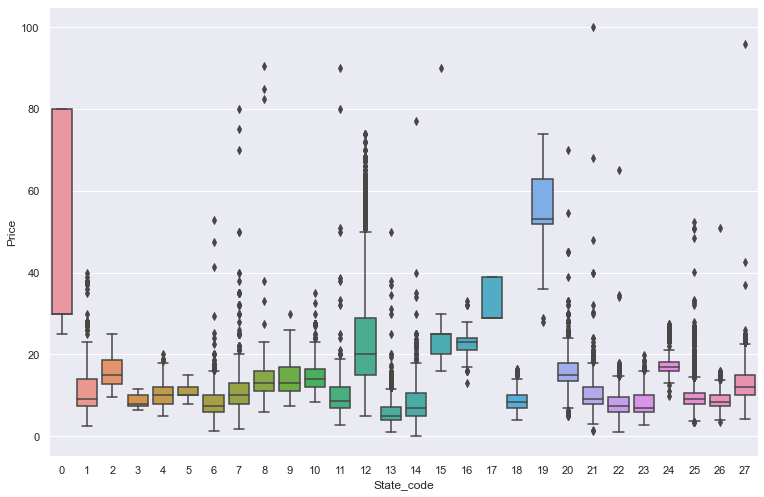

In [48]:
sns.boxplot(x='State_code',y='Price',data=data)

<AxesSubplot:xlabel='State_code', ylabel='Price'>

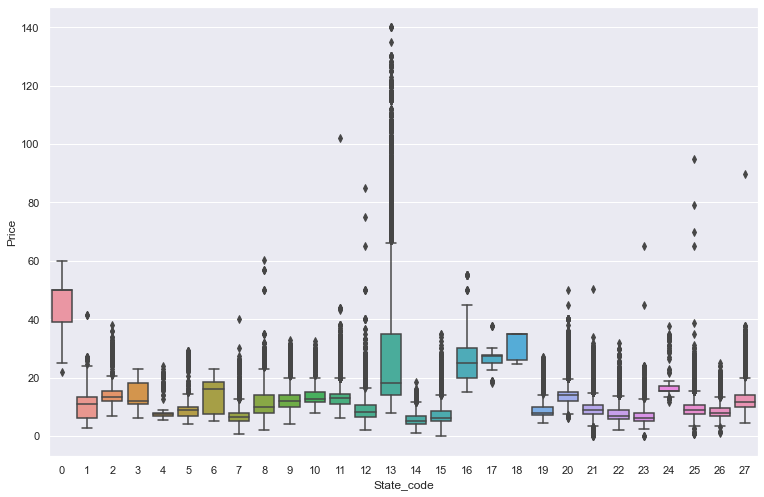

In [49]:
sns.boxplot(x='State_code',y='Price',data=data2)

<AxesSubplot:xlabel='State_code', ylabel='Price'>

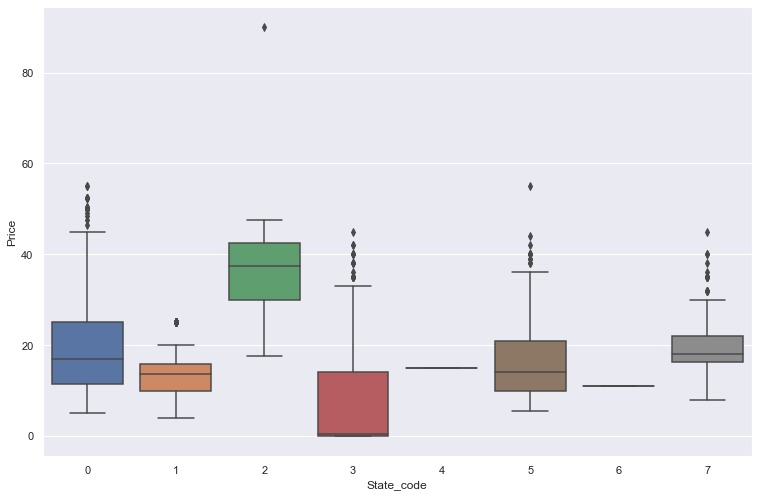

In [50]:
sns.boxplot(x='State_code',y='Price',data=data3)

<AxesSubplot:xlabel='State_code', ylabel='Price'>

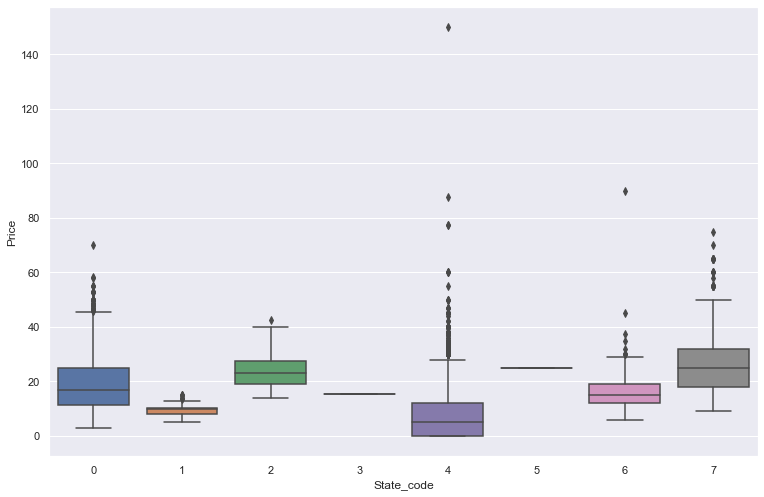

In [51]:
sns.boxplot(x='State_code',y='Price',data=data4)

<AxesSubplot:xlabel='State_code', ylabel='Price'>

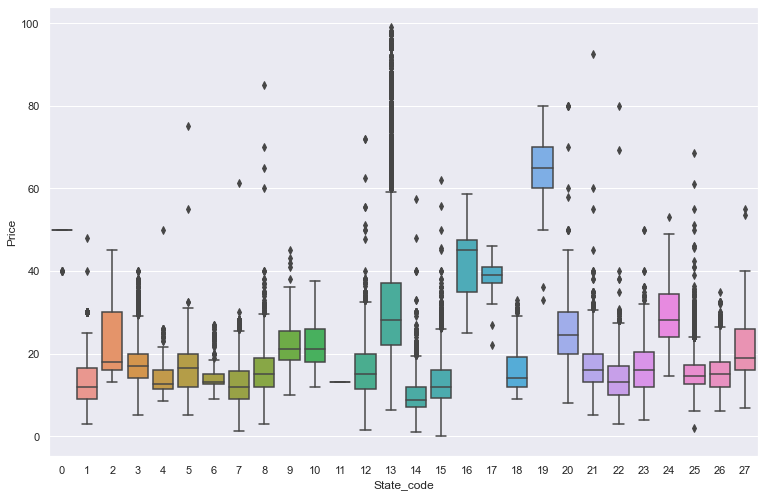

In [52]:
sns.boxplot(x='State_code',y='Price',data=data5[data5.Price<100])

<AxesSubplot:xlabel='State_code', ylabel='Price'>

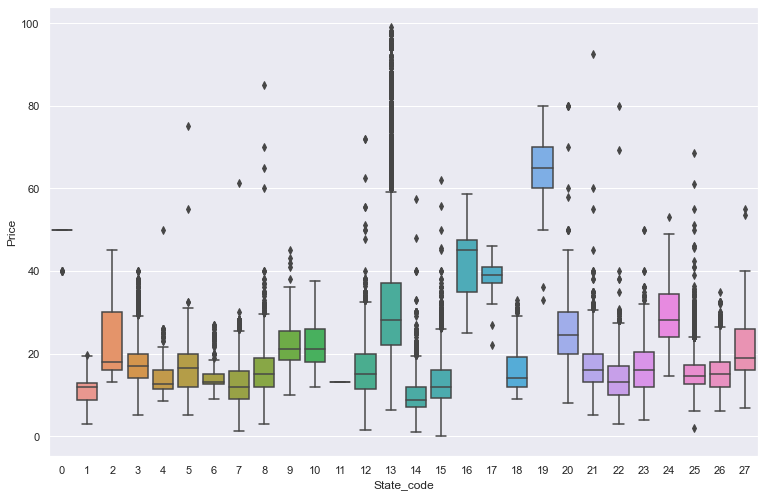

In [53]:
lst=[]
temp=dataset5
indexAge = dataset5[ (dataset5['Price'] >= 20) & (dataset5['State_code'] ==1) ].index
dataset5.drop(indexAge , inplace=True)
sns.boxplot(x='State_code',y='Price',data=dataset5[dataset5.Price<100])

<AxesSubplot:xlabel='State_code', ylabel='Price'>

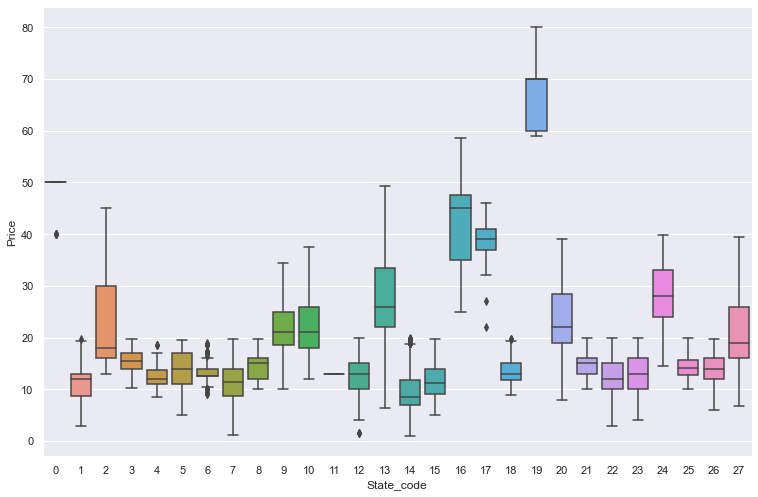

In [54]:
lst=[1,3,4,5,6,7,8,11,12,14,15,18,21,22,23,25,26]
for i in lst:
    indexAge = dataset5[ (dataset5['Price'] >= 20) & (dataset5.State_code==i) ].index
    dataset5.drop(indexAge ,inplace=True)
    
indexAge = dataset5[ (dataset5['Price'] >= 50) & (dataset5.State_code==13) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] >= 35) & (dataset5.State_code==9) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] <= 50) & (dataset5.State_code==19) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] >= 40) & (dataset5.State_code==20) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] >= 35) & (dataset5.State_code==9) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] >= 40) & (dataset5.State_code==24) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] >= 40) & (dataset5.State_code==27) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] <=10) & (dataset5.State_code==21) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] <=10) & (dataset5.State_code==25) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] <=5) & (dataset5.State_code==15) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] <=10) & (dataset5.State_code==8) ].index
dataset5.drop(indexAge ,inplace=True)

indexAge = dataset5[ (dataset5['Price'] <=10) & (dataset5.State_code==3) ].index
dataset5.drop(indexAge ,inplace=True)

sns.boxplot(x='State_code',y='Price',data=dataset5[dataset5.Price<100])

<AxesSubplot:xlabel='State_code', ylabel='Price'>

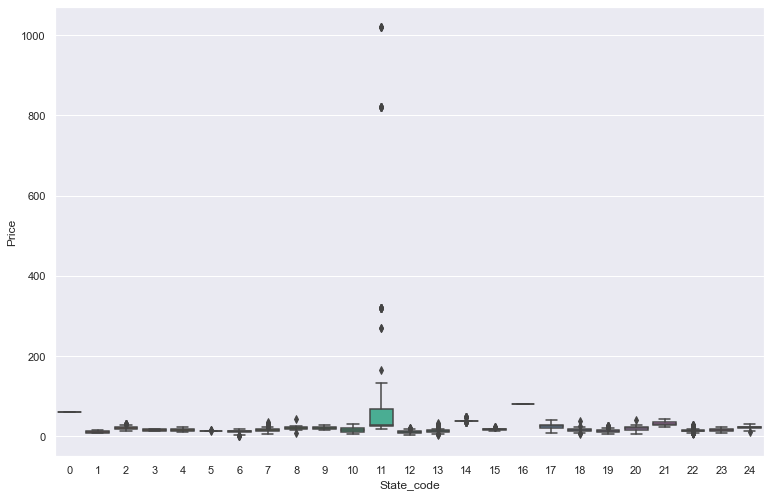

In [55]:
sns.boxplot(x='State_code',y='Price',data=data6)

In [56]:
# sns.boxplot(x='State_code',y='Price',data=data)

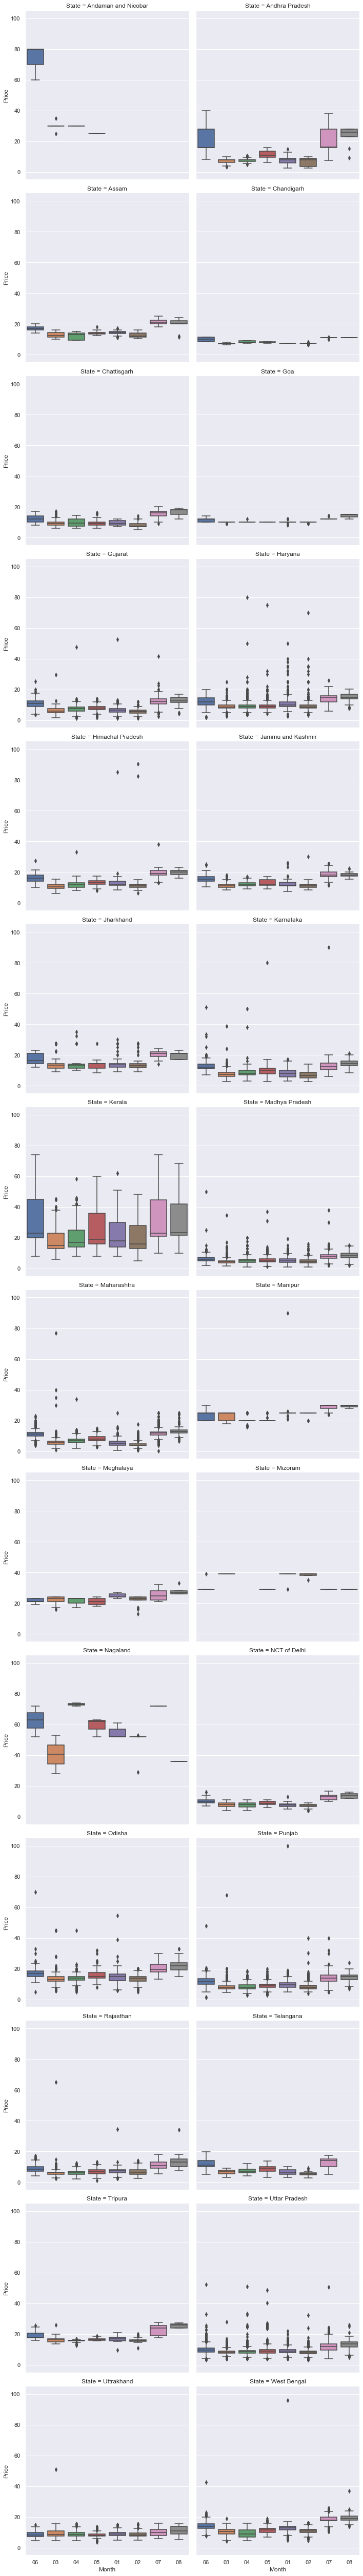

In [57]:
sns.catplot(x='Month',y='Price',col='State',col_wrap=2,data=dataset,kind='box')


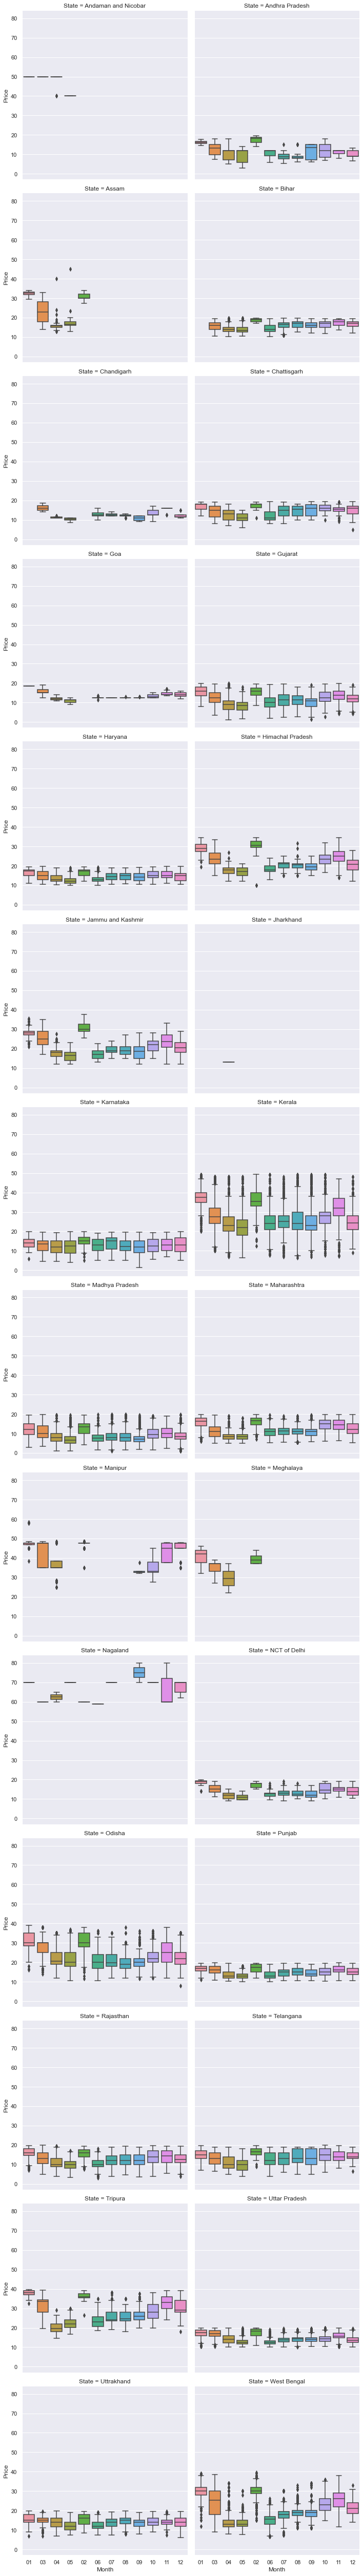

In [58]:
sns.catplot(x='Month',y='Price',col='State',col_wrap=2,data=dataset5,kind='box')

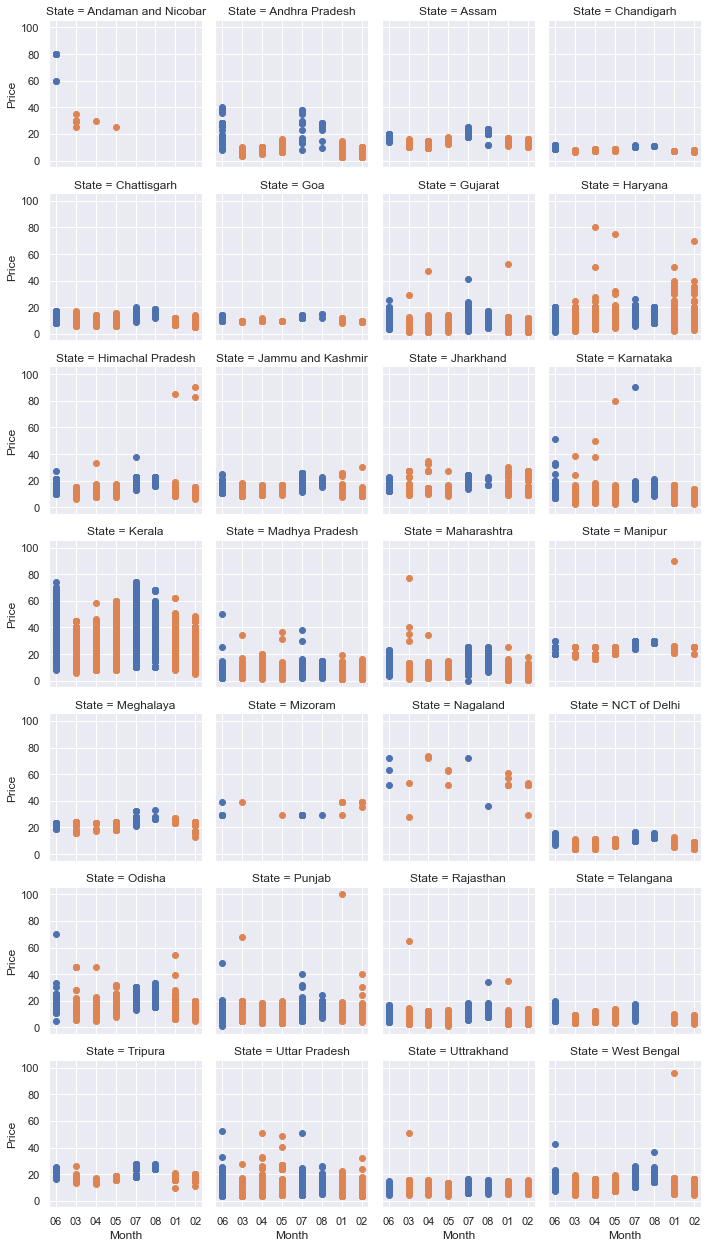

In [59]:
g = sns.FacetGrid(dataset,  col="State",hue="Harvesting Month" ,col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


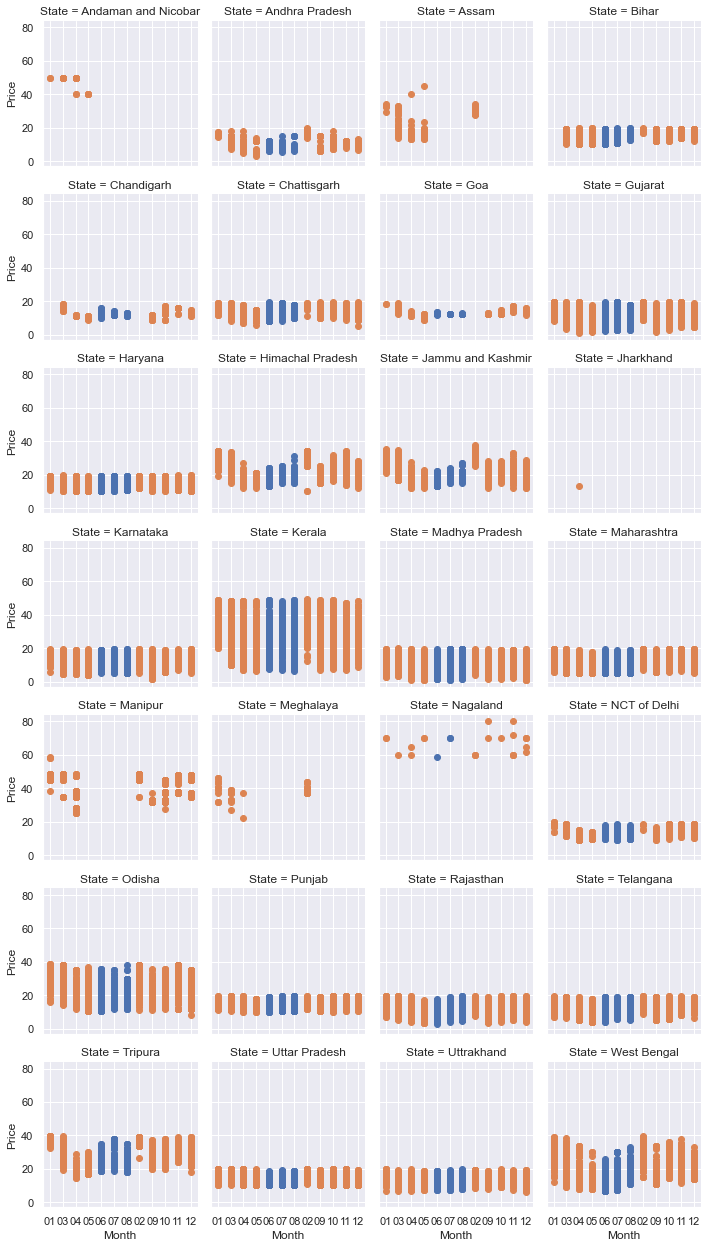

In [60]:
g = sns.FacetGrid(dataset5,  col="State",hue="Harvesting Month", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")

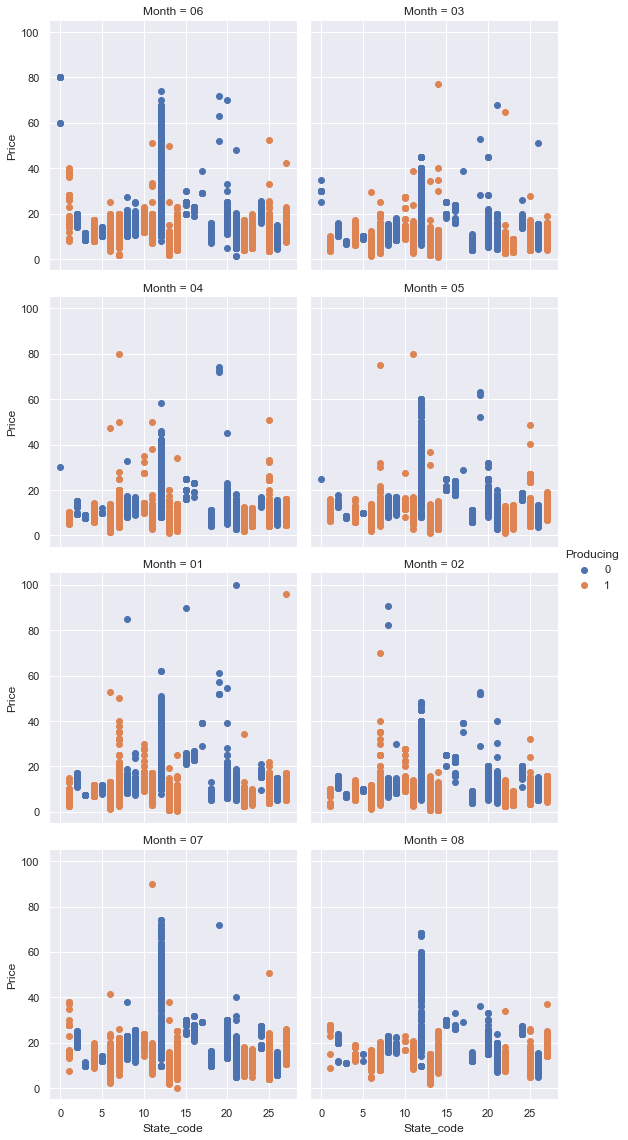

In [61]:

g = sns.FacetGrid(dataset,  col="Month",hue="Producing", col_wrap=2, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

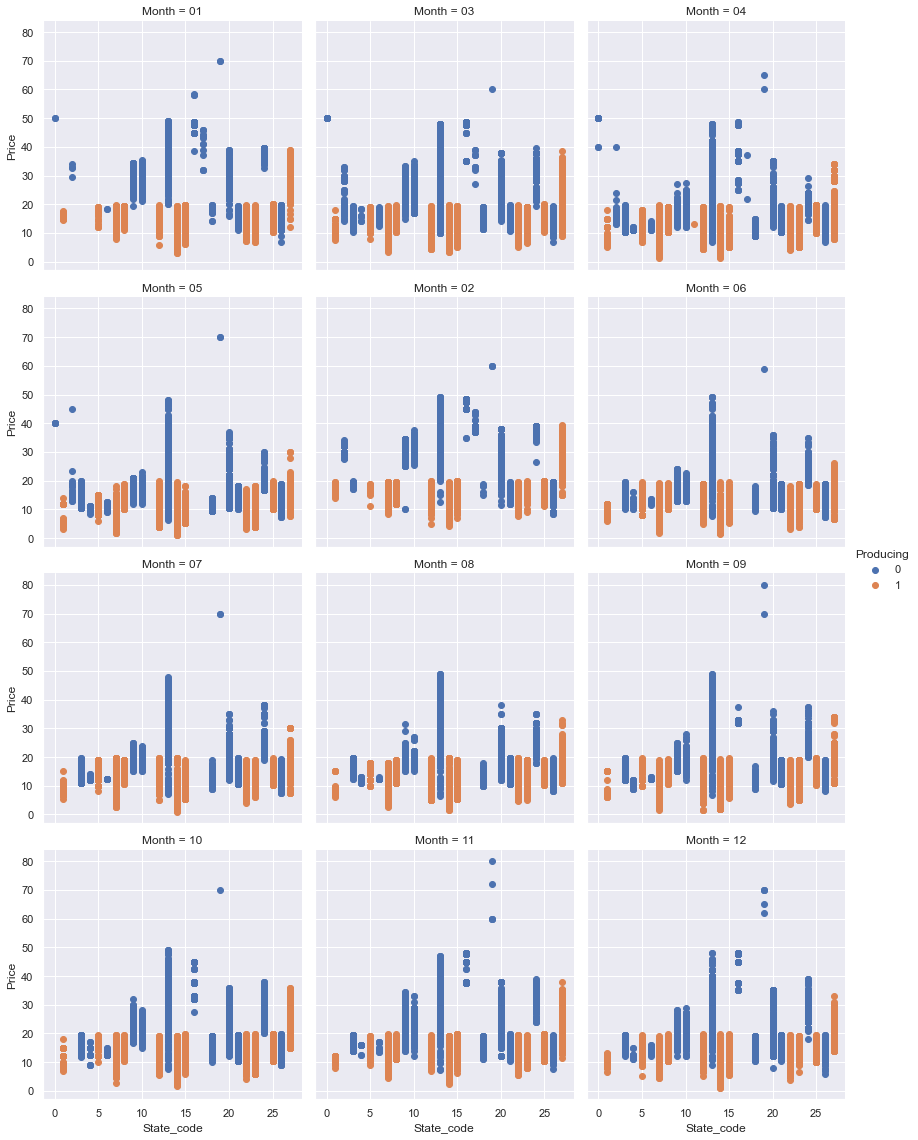

In [62]:
g = sns.FacetGrid(dataset5,  col="Month",hue="Producing", col_wrap=3, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

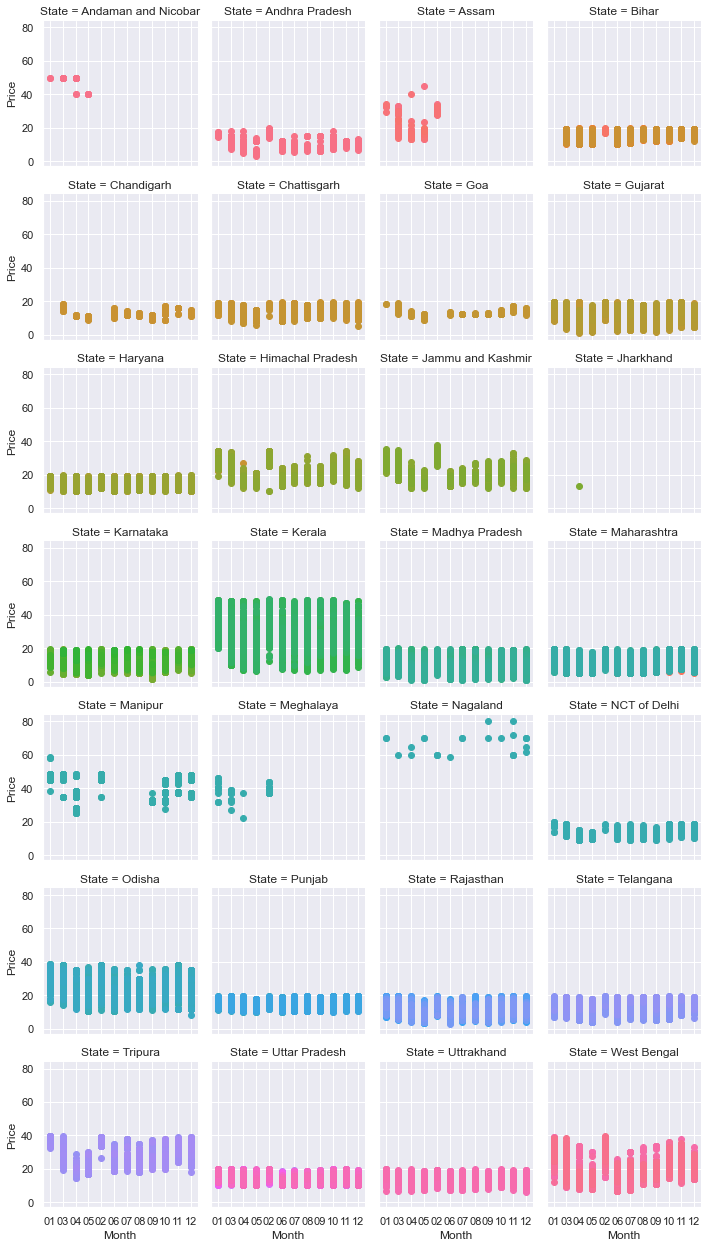

In [63]:
g = sns.FacetGrid(dataset5,  col="State",hue="District", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


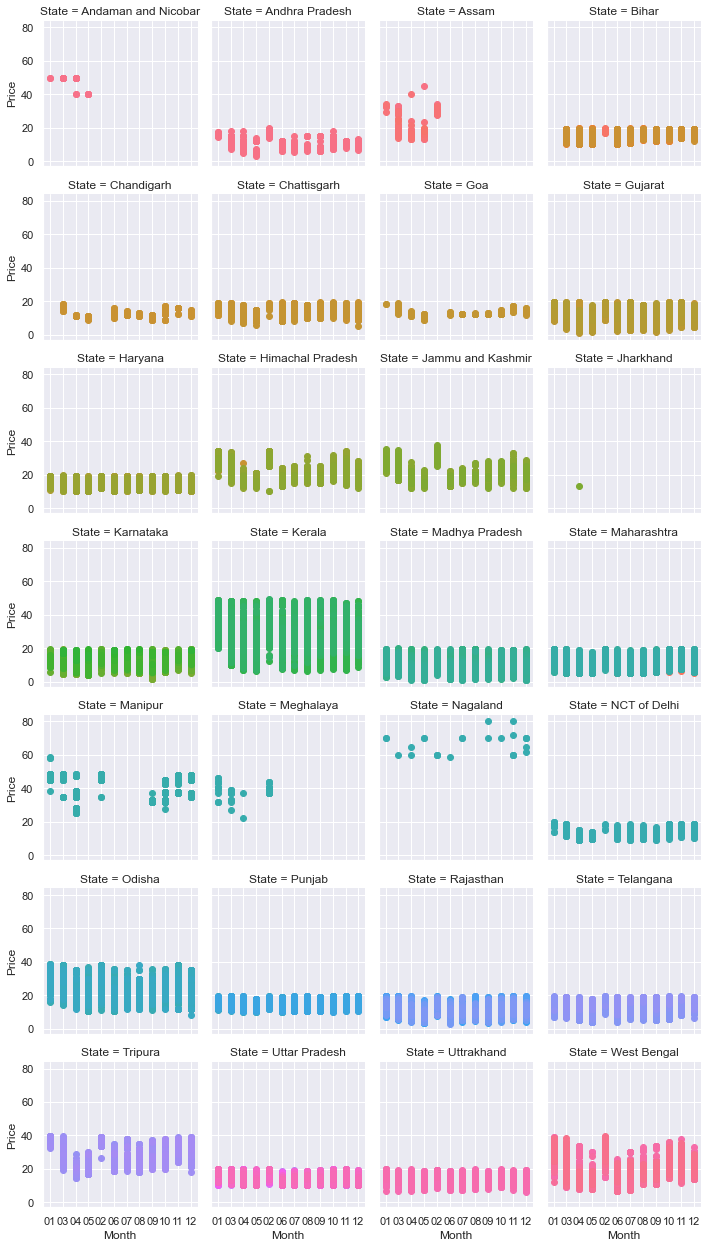

In [64]:
g = sns.FacetGrid(dataset5,  col="State",hue="District", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


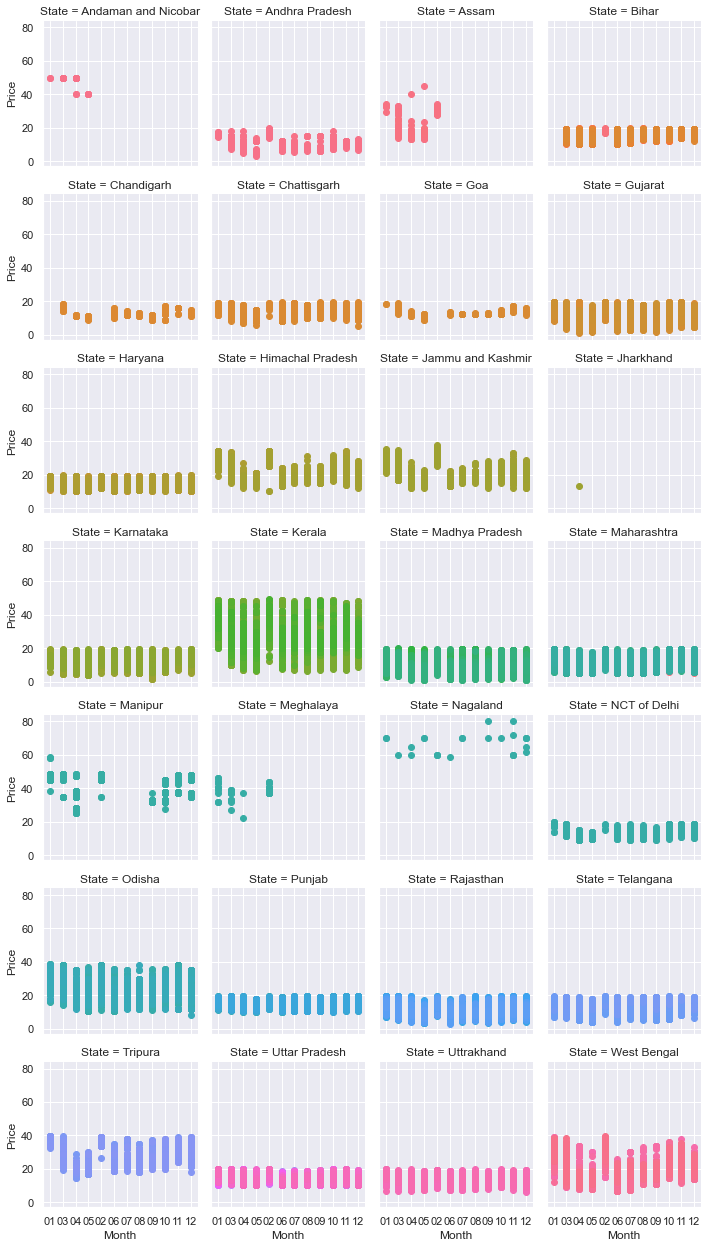

In [65]:
g = sns.FacetGrid(dataset5,  col="State",hue="Market", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


In [66]:
s=dataset["Variety"].values
s=np.unique(s)
names = list(mcolors.CSS4_COLORS)
pal={}
for x in range(len(s)):
    new_key=s[x]
    new_val=names[x]
    pal[new_key]=new_val
pal

{'1st Sort': 'aliceblue',
 '2nd Sort': 'antiquewhite',
 'Bangalore-Samall': 'aqua',
 'Beelary-Red': 'aquamarine',
 'Bellary': 'azure',
 'Big': 'beige',
 'Bombay (U.P.)': 'bisque',
 'Dry F.A.Q.': 'black',
 'Hybrid': 'blanchedalmond',
 'Local': 'blue',
 'Medium': 'blueviolet',
 'Nasik': 'brown',
 'Onion': 'burlywood',
 'Other': 'cadetblue',
 'Pole': 'chartreuse',
 'Puna': 'chocolate',
 'Pusa-Red': 'coral',
 'Red': 'cornflowerblue',
 'Small': 'cornsilk',
 'Telagi': 'crimson',
 'White': 'cyan'}

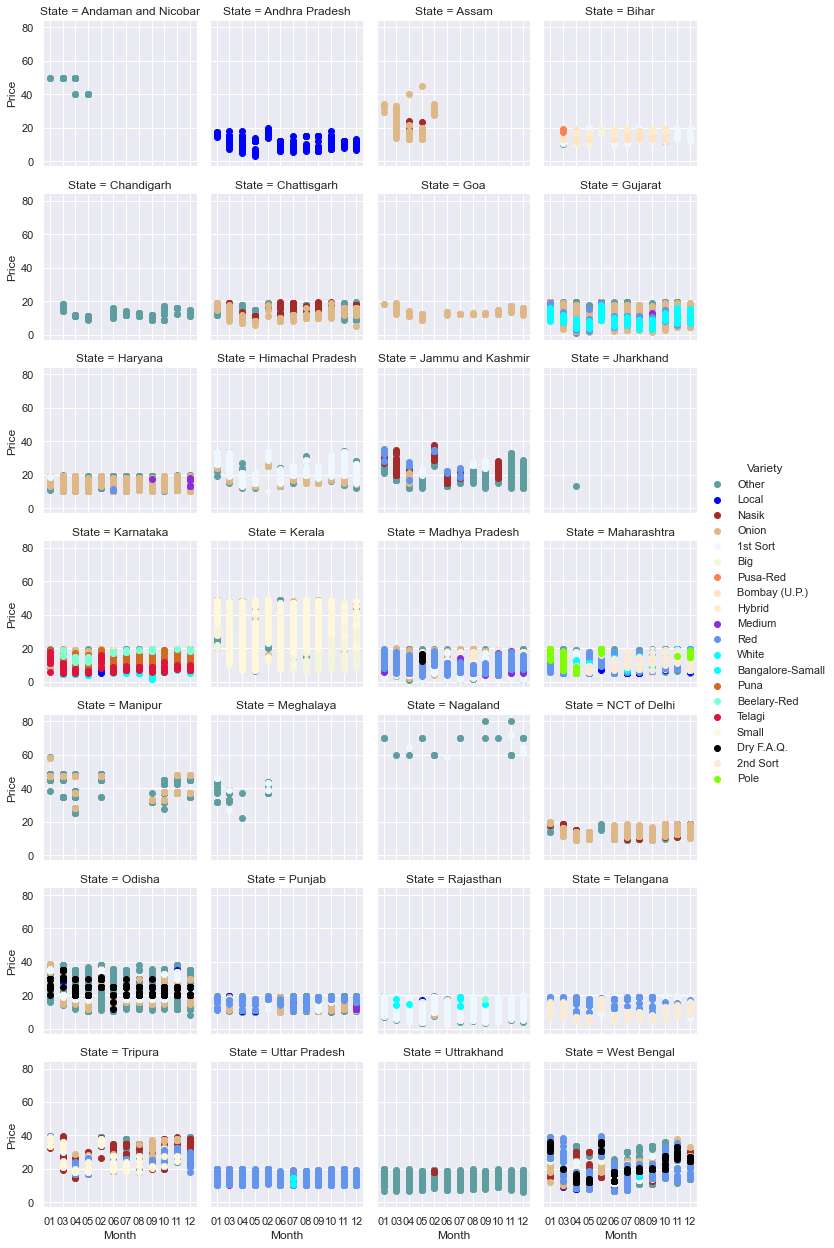

In [67]:
g = sns.FacetGrid(dataset5,  col="State",hue="Variety",palette=pal, col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")
g.add_legend()

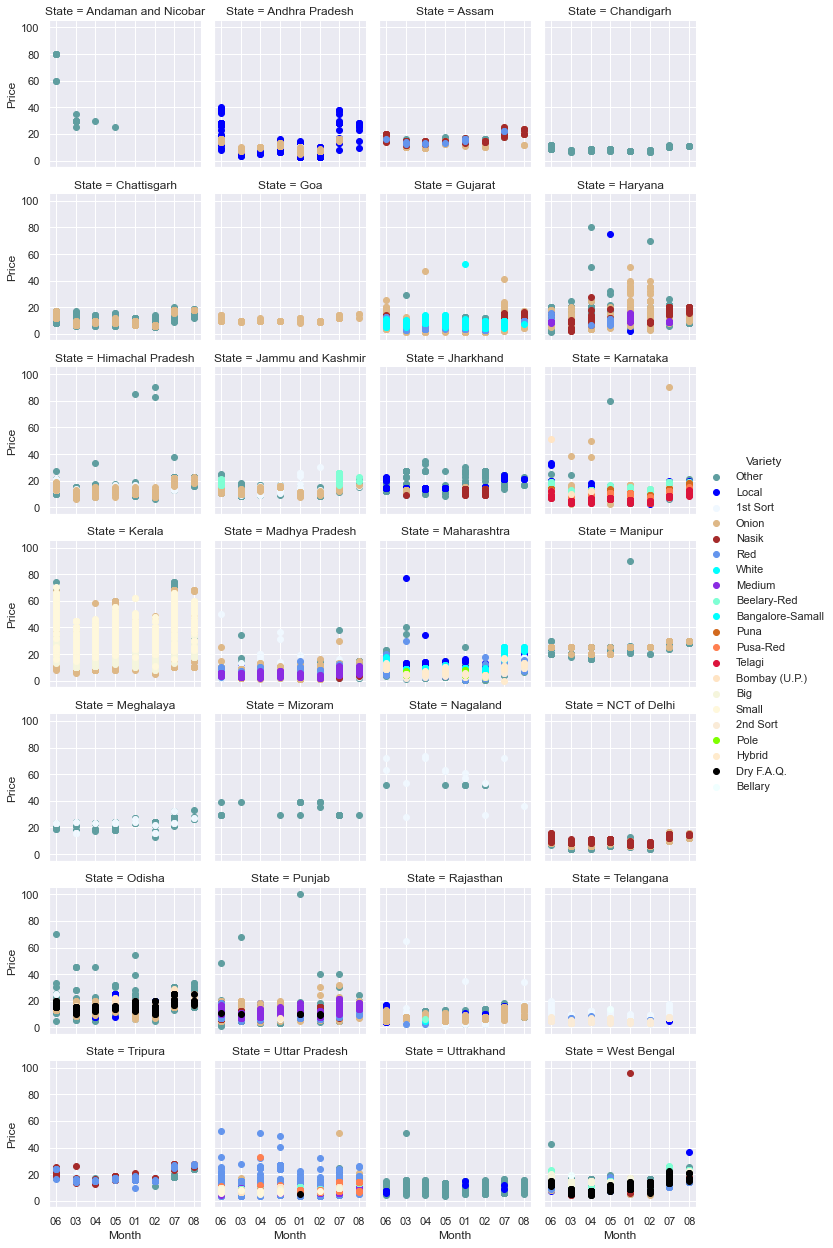

In [68]:
g = sns.FacetGrid(dataset,  col="State",hue="Variety",palette=pal, col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")
g.add_legend()

In [69]:

# g = sns.FacetGrid(dataset,  col="Month",hue="Drought Happen", col_wrap=2, height=4)
# g.map(plt.scatter,"State_code","Price")
# g.add_legend()

In [70]:
# g = sns.FacetGrid(datasets,  col="Month",hue="Drought Happen", col_wrap=3, height=4)
# g.map(plt.scatter,"State_code","Price")
# g.add_legend()

In [71]:
dataset.head()


,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0,06,0,80.0,0,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0,06,0,80.0,0,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0,06,0,80.0,0,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0,06,0,80.0,0,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0,06,0,60.0,0,0


In [72]:
# dataset['Market'].unique().shape,dataset['Harvesting Month'].unique().shape,dataset['Drought Happen'].unique().shape,dataset['Producing'].unique().shape,dataset['State_code'].unique().shape,dataset['Month'].unique().shape,dataset['Variety'].unique().shape,dataset['District'].unique().shape

In [73]:
dataset.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Arrival_Date',
       'Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price', 'Month',
       'State_code', 'Price', 'Producing', 'Harvesting Month'],
      dtype='object')

In [74]:
df1= dataset.drop(['State','Market','Commodity','Modal_x0020_Price','Arrival_Date','Min_x0020_Price','Max_x0020_Price'],axis=1)
df2= dataset2.drop(['State','Market','Commodity','Modal_x0020_Price','Arrival_Date','Min_x0020_Price','Max_x0020_Price'],axis=1)
df3= dataset3.drop(['State','Market','Commodity','Modal_x0020_Price','Arrival_Date','Min_x0020_Price','Max_x0020_Price'],axis=1)
df4= dataset4.drop(['State','Market','Commodity','Modal_x0020_Price','Arrival_Date','Min_x0020_Price','Max_x0020_Price'],axis=1)
df5= dataset5.drop(['State','Market','Commodity','Modal_x0020_Price','Arrival_Date','Min_x0020_Price','Max_x0020_Price'],axis=1)
df6= dataset6.drop(['State','Market','Commodity','Modal_x0020_Price','Arrival_Date','Min_x0020_Price','Max_x0020_Price'],axis=1)
df5.head()

,District,Variety,Month,State_code,Price,Producing,Harvesting Month
0,South Andaman,Other,01,0,50.0,0,1
1,South Andaman,Other,01,0,50.0,0,1
2,South Andaman,Other,03,0,50.0,0,1
3,South Andaman,Other,03,0,50.0,0,1
4,South Andaman,Other,03,0,50.0,0,1


In [75]:
x1=df5.drop('Price',axis=1)
y1=df5['Price']
x1

,District,Variety,Month,State_code,Producing,Harvesting Month
0,South Andaman,Other,01,0,0,1
1,South Andaman,Other,01,0,0,1
2,South Andaman,Other,03,0,0,1
3,South Andaman,Other,03,0,0,1
4,South Andaman,Other,03,0,0,1
...,...,...,...,...,...,...
201919,Sounth 24 Parganas,Red,12,27,1,1
201920,Sounth 24 Parganas,Red,12,27,1,1
201921,Sounth 24 Parganas,Red,12,27,1,1
201922,Sounth 24 Parganas,Red,12,27,1,1


In [76]:
df5[df5.Price<10]

,District,Variety,Month,State_code,Price,Producing,Harvesting Month
81,Kurnool,Local,03,1,9.8,1,1
85,Kurnool,Local,03,1,9.87,1,1
86,Kurnool,Local,03,1,9.59,1,1
87,Kurnool,Local,03,1,9.51,1,1
88,Kurnool,Local,03,1,9.29,1,1
...,...,...,...,...,...,...,...
197996,Murshidabad,Red,07,27,8.3,1,0
197997,Murshidabad,Red,07,27,8.3,1,0
197998,Murshidabad,Red,07,27,9.05,1,0
197999,Murshidabad,Red,07,27,8.9,1,0


In [77]:
df2=pd.get_dummies(df1['District'])
# df3=pd.concat()
df2.head()

,Adilabad,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Alappuzha,Aligarh,Alirajpur,Allahabad,...,Udupi,Ujjain,Una,Unnao,Vadodara(Baroda),Varanasi,West Garo Hills,West Godavari,Yamuna Nagar,kapurthala
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df3=pd.get_dummies(df1['Variety'])
df3.head()

,1st Sort,2nd Sort,Bangalore-Samall,Beelary-Red,Bellary,Big,Bombay (U.P.),Dry F.A.Q.,Hybrid,Local,...,Nasik,Onion,Other,Pole,Puna,Pusa-Red,Red,Small,Telagi,White
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [79]:
dataset5

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,29/01/2022,4000.0,7000.0,5000.0,01,0,50.0,0,1
1,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,31/01/2022,4000.0,6000.0,5000.0,01,0,50.0,0,1
2,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,14/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
3,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,15/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
4,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,16/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201919,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,26/12/2022,2650.0,2750.0,2700.0,12,27,27.0,1,1
201920,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,27/12/2022,2650.0,2750.0,2700.0,12,27,27.0,1,1
201921,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,28/12/2022,2650.0,2750.0,2700.0,12,27,27.0,1,1
201922,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,29/12/2022,2650.0,2750.0,2700.0,12,27,27.0,1,1


In [80]:
# dataset5.to_csv('newDataFile.csv',index=False)

In [81]:
d=pd.read_csv('newDataFile.csv')

In [82]:
X=dataset5.values[:,[1,4,9,10,12,13]]
Y=dataset5.values[:,11]

In [122]:
X[520]

array(['Barpeta', 'Onion', 2, 2, 0, 1], dtype=object)

In [123]:
Y[520]

32.0

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[: ,0]= labelencoder_X.fit_transform(X[: ,0])
X[: ,1]= labelencoder_X.fit_transform(X[: ,1])
# X[: ,2]= labelencoder_X.fit_transform(X[: ,2])
onehotencoder= OneHotEncoder(categories='auto')
X= onehotencoder.fit_transform(X).toarray()
# X=np.delete(X,[0,28,368,1288],1)


In [86]:
X[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [87]:
X.shape

(165489, 440)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)
X_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [89]:
X_test[0].shape

(440,)

 **Linear Regression** 

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
y_pred= regressor.predict(X_test)
regressor.score(X_test,Y_test)

-7.584602627269368e+18

In [91]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten(),'Error':y_pred-Y_test,'Percent_Error':(y_pred-Y_test)/Y_test*100})
print(df)
df.mean(axis=0)


      Actual  Predicted     Error Percent_Error
0       12.0  11.085938 -0.914062     -7.617188
1       16.5  12.757812 -3.742188    -22.679924
2       16.5  14.718750  -1.78125    -10.795455
3        9.5  10.093750   0.59375          6.25
4       13.0  13.984375  0.984375      7.572115
...      ...        ...       ...           ...
33093   13.0  15.828125  2.828125     21.754808
33094   18.0  16.601562 -1.398438     -7.769097
33095   17.0  14.617188 -2.382812    -14.016544
33096   21.5  18.804688 -2.695312    -12.536337
33097   17.0  14.304688 -2.695312    -15.854779

[33098 rows x 4 columns]


Actual           1.656305e+01
Predicted        1.512658e+08
Error            1.512657e+08
Percent_Error    9.463350e+08
dtype: float64

**Lasso Linear Model**

In [92]:
from sklearn import linear_model
reg1 = linear_model.Lasso(alpha=0.05)
reg1.fit(X_train,Y_train)
y_pred= reg1.predict(X_test)
reg1.score(X_test, Y_test)

0.6861081112142787

In [93]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten(),'Error':y_pred-Y_test,'Percent_Error':(y_pred-Y_test)/Y_test*100})
print(df)
df.mean(axis=0)

      Actual  Predicted     Error Percent_Error
0       12.0  11.481286 -0.518714     -4.322613
1       16.5  12.616338 -3.883662    -23.537345
2       16.5  14.463272 -2.036728    -12.343808
3        9.5  12.477057  2.977057      31.33744
4       13.0  13.768860   0.76886      5.914306
...      ...        ...       ...           ...
33093   13.0  14.463272  1.463272     11.255937
33094   18.0  16.434751 -1.565249     -8.695826
33095   17.0  12.659723 -4.340277    -25.531044
33096   21.5  20.294809 -1.205191     -5.605538
33097   17.0  15.655393 -1.344607      -7.90945

[33098 rows x 4 columns]


Actual           16.563048
Predicted        16.552670
Error            -0.010378
Percent_Error     6.651430
dtype: float64

**MLP Regression**

In [94]:
X_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [95]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
reg3 = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
y_pred= reg3.predict(X_test)
reg3.score(X_test, Y_test)

0.8756804725823829

In [96]:
X_train[0]

array([-4.76032185e-03, -8.51952474e-02, -5.38640818e-02, -1.10218566e-01,
       -6.10124336e-02, -1.11718291e-01, -5.94972010e-02, -3.36792621e-02,
       -7.78235641e-02, -3.85053009e-02, -3.48937736e-02, -7.34290004e-02,
       -5.10405037e-02, -4.18982246e-02, -3.67951924e-02, -3.53251116e-02,
       -4.45298848e-02, -7.27162159e-03, -4.90689244e-02, -1.92419549e-02,
       -5.15585625e-02, -8.29168523e-02, -3.75087449e-02, -8.28706634e-02,
       -2.90980282e-02, -1.31817301e-02, -4.96838146e-02, -6.87050353e-02,
       -5.36521015e-02, -6.98607865e-02, -5.76139194e-02, -3.35666832e-02,
       -6.43523616e-02, -7.64861445e-02, -3.36792621e-02, -6.15711722e-02,
       -6.53507183e-02, -7.53285774e-02, -6.33986124e-02, -1.06448857e-02,
       -3.26521450e-02, -1.67198481e-02, -4.12602054e-02, -9.90977442e-03,
       -4.40160482e-02, -3.41258806e-02, -1.34652914e-02, -6.14559550e-03,
       -3.43470221e-02, -4.07054281e-02, -2.54953570e-02, -4.67728922e-02,
       -1.06448857e-02, -

In [119]:
X_test[5],Y_test[5]

(array([-4.76032185e-03, -8.51952474e-02, -5.38640818e-02, -1.10218566e-01,
        -6.10124336e-02, -1.11718291e-01, -5.94972010e-02, -3.36792621e-02,
        -7.78235641e-02, -3.85053009e-02, -3.48937736e-02, -7.34290004e-02,
        -5.10405037e-02, -4.18982246e-02, -3.67951924e-02, -3.53251116e-02,
        -4.45298848e-02, -7.27162159e-03, -4.90689244e-02, -1.92419549e-02,
        -5.15585625e-02, -8.29168523e-02, -3.75087449e-02, -8.28706634e-02,
        -2.90980282e-02, -1.31817301e-02, -4.96838146e-02, -6.87050353e-02,
        -5.36521015e-02, -6.98607865e-02, -5.76139194e-02, -3.35666832e-02,
        -6.43523616e-02, -7.64861445e-02, -3.36792621e-02, -6.15711722e-02,
        -6.53507183e-02, -7.53285774e-02, -6.33986124e-02, -1.06448857e-02,
        -3.26521450e-02, -1.67198481e-02, -4.12602054e-02, -9.90977442e-03,
        -4.40160482e-02, -3.41258806e-02, -1.34652914e-02, -6.14559550e-03,
        -3.43470221e-02, -4.07054281e-02, -2.54953570e-02, -4.67728922e-02,
        -1.0

In [121]:
reg3.predict([X_test[5]])

array([8.7385322])

In [97]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten(),'Error':y_pred-Y_test,'Percent_Error':(y_pred-Y_test)/Y_test*100})
print(df)
df.mean(axis=0)

      Actual  Predicted     Error Percent_Error
0       12.0  11.613824 -0.386176     -3.218135
1       16.5  17.757301  1.257301      7.620003
2       16.5  15.029807 -1.470193     -8.910262
3        9.5   9.192806 -0.307194      -3.23362
4       13.0  13.523907  0.523907      4.030052
...      ...        ...       ...           ...
33093   13.0  15.357778  2.357778     18.136757
33094   18.0  17.637595 -0.362405     -2.013361
33095   17.0  14.723419 -2.276581    -13.391654
33096   21.5  22.141418  0.641418       2.98334
33097   17.0  14.836803 -2.163197    -12.724687

[33098 rows x 4 columns]


Actual           16.563048
Predicted        16.746387
Error             0.183339
Percent_Error     3.592955
dtype: float64

In [98]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Coefficients: \n', regressor.coef_)

Mean Absolute Error: 1.6504640568715765
Mean Squared Error: 6.206681176085964
Root Mean Squared Error: 2.491321170801943
Coefficients: 
 [-8.83515845e+12  8.64958899e+11 -1.20196855e+13  4.33770294e+11
 -3.94299566e+12 -2.64794457e+12  8.64958899e+11 -4.19736600e+12
  8.64958899e+11 -3.94299566e+12  4.33770294e+11 -3.67064887e+12
  8.64958899e+11  2.90099907e+12 -1.20196855e+13  2.98166939e+12
 -3.30605632e+12 -4.19736600e+12  4.33770294e+11  4.33770294e+11
  8.64958899e+11  4.33770294e+11  8.64958899e+11  8.64958899e+11
 -4.19736600e+12 -7.05370142e+12  8.64958899e+11  8.64958899e+11
 -3.30605632e+12  8.64958899e+11  8.64958899e+11 -1.20196855e+13
  8.64958899e+11 -7.05370142e+12  4.33770294e+11 -3.43415877e+11
  8.64958899e+11  8.64958899e+11 -3.30605632e+12 -3.94299566e+12
  2.90099907e+12 -6.73161249e+12  8.64958899e+11  4.33770294e+11
  4.33770294e+11 -7.05370142e+12 -7.05370142e+12 -4.19736600e+12
  8.64958899e+11 -3.30605632e+12  4.33770294e+11 -3.94299566e+12
 -1.20196855e+13  

In [99]:
dataset5.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,29/01/2022,4000.0,7000.0,5000.0,01,0,50.0,0,1
1,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,31/01/2022,4000.0,6000.0,5000.0,01,0,50.0,0,1
2,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,14/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
3,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,15/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
4,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,16/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1


## predict price function 

In [100]:
df1= dataset5.drop(['State','Market','Commodity','Modal_x0020_Price','Arrival_Date','Min_x0020_Price','Max_x0020_Price'],axis=1)

x=df1.drop('Price',axis=1)
y=df1['Price']

df2=pd.get_dummies(df1['District'])


df3=pd.get_dummies(df1['Variety'])

df4=pd.get_dummies(df1['Month'])
df5=pd.get_dummies(df1['State_code'])
df6=pd.get_dummies(df1['Producing'])
df7=pd.get_dummies(df1['Harvesting Month'])


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [101]:
df2.columns

Index(['Adilabad', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Ajmer', 'Alappuzha',
       'Aligarh', 'Alirajpur', 'Allahabad', 'Alwar',
       ...
       'Unnao', 'Unokoti', 'Vadodara(Baroda)', 'Vaishali', 'Varanasi',
       'West Chambaran', 'West District', 'West Garo Hills', 'Yamuna Nagar',
       'kapurthala'],
      dtype='object', length=376)

In [102]:
df2.shape,df3.shape,df4.shape,df5.shape,df6.shape,df7.shape

((165489, 376),
 (165489, 20),
 (165489, 12),
 (165489, 28),
 (165489, 2),
 (165489, 2))

In [103]:
dataset5.Month

0         01
1         01
2         03
3         03
4         03
          ..
201919    12
201920    12
201921    12
201922    12
201923    12
Name: Month, Length: 165489, dtype: object

In [104]:
df2.columns

Index(['Adilabad', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Ajmer', 'Alappuzha',
       'Aligarh', 'Alirajpur', 'Allahabad', 'Alwar',
       ...
       'Unnao', 'Unokoti', 'Vadodara(Baroda)', 'Vaishali', 'Varanasi',
       'West Chambaran', 'West District', 'West Garo Hills', 'Yamuna Nagar',
       'kapurthala'],
      dtype='object', length=376)

In [105]:
X[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [106]:
dataset5.State.unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chattisgarh', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Nagaland', 'NCT of Delhi', 'Odisha', 'Punjab', 'Rajasthan',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttrakhand',
       'West Bengal'], dtype=object)

In [107]:
dataset5.District.unique()

array(['South Andaman', 'Kurnool', 'Barpeta', 'Cachar', 'Dhubri',
       'Dibrugarh', 'Hailakandi', 'Jorhat', 'Kamrup', 'Karimganj',
       'Kokrajhar', 'Sibsagar', 'Tinsukia', 'Araria', 'Arwal',
       'Aurangabad', 'Banka', 'Begusarai', 'Bhagalpur', 'Bhojpur',
       'Buxar', 'Chhapra', 'Darbhanga', 'East Champaran/ Motihari',
       'Gopalgang', 'Jamui', 'Jehanabad', 'Kaimur/Bhabhua', 'Kaithar',
       'Khagaria', 'Kishanganj', 'Luckeesarai', 'Madhepura', 'Madhubani',
       'Munghair', 'Muzaffarpur', 'Nalanda', 'Nawada', 'Patna', 'Purnea',
       'Rohtas', 'Saharsa', 'Samastipur', 'Saran', 'Sheikhpura',
       'Sheohar', 'Sitamarhi', 'Siwan', 'Supaul', 'Vaishali',
       'West Chambaran', 'Chandigarh', 'Bilaspur', 'Durg', 'Raigarh',
       'Rajnandgaon', 'North Goa', 'Ahmedabad', 'Anand', 'Banaskanth',
       'Bharuch', 'Bhavnagar', 'Dahod', 'Jamnagar', 'Junagarh', 'Kheda',
       'Mehsana', 'Navsari', 'Porbandar', 'Rajkot', 'Surat',
       'Surendranagar', 'Vadodara(Baroda)', 'Amb

In [108]:
statss=dataset.State.unique()
np.where(statss=='Gujarat')[0][0]



6

In [109]:
    d=pd.read_csv('newDataFile.csv')
    
#     d['State_code']=le.fit_transform(d['State'])
#     sc[i]=le.transform(onion_producing_states)         
    X=d.values[:,[1,4,9,10,12,13]]
    Y=d.values[:,11]
    X[: ,0]

array(['South Andaman', 'South Andaman', 'South Andaman', ...,
       'Sounth 24 Parganas', 'Sounth 24 Parganas', 'Sounth 24 Parganas'],
      dtype=object)

In [128]:
def predict_price(State,District,Variety,Month,isProducing,Harvesting_month):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    from sklearn.preprocessing import StandardScaler
    
    statss=dataset.State.unique()
    c_State=np.where(statss==State)[0][0]
    data=[District,Variety,Month,c_State, isProducing,Harvesting_month]

    d=pd.read_csv('newDataFile.csv')
    
#     d['State_code']=le.fit_transform(d['State'])
#     sc[i]=le.transform(onion_producing_states)         
    x=d.values[:,[1,4,9,10,12,13]]
    y=d.values[:,11]


    labelencoder_X = LabelEncoder()
    x[: ,0]= labelencoder_X.fit_transform(x[: ,0])
#     data2=labelencoder_X.transform(data[0])
    x[: ,1]= labelencoder_X.fit_transform(x[: ,1])
    # X[: ,2]= labelencoder_X.fit_transform(X[: ,2])
#     data3=labelencoder_X.transform(data[1])
#     data4=
    onehotencoder= OneHotEncoder(categories='auto')
    x= onehotencoder.fit_transform(x).toarray()
#     data3=onehotencoder.transform(data2)
    # X=np.delete(X,[0,28,368,1288],1)
    
    
    c_District=np.where(df2.columns==District)[0][0]
    c_Variety=375+np.where(df3.columns==Variety)[0][0]
    c_Month=396+np.where(df4.columns==Month)[0][0]
    c_State=408+np.where(statss==State)[0][0]
    c_isProducing=436+np.where(df6.columns==isProducing)[0][0]
    c_Harvesting_month=438+np.where(df7.columns==Harvesting_month)[0][0]

    
    pridictData=np.zeros(440)
    pridictData[c_District]=1
    pridictData[c_Variety]=1
    pridictData[c_Month]=1
    pridictData[c_State]=1
    pridictData[c_isProducing]=1
    pridictData[c_Harvesting_month]=1
#     pridictData[c_isDrought]=1


    scaler = StandardScaler()
    scaler.fit(x)
    newdata = scaler.transform([pridictData]) 
    
    
    
#     c_District=np.where(df2.columns==District)[0][0]
#     c_Variety=375+np.where(df3.columns==Variety)[0][0]
#     c_Month=395+np.where(df4.columns==Month)[0][0]
#     c_State=407+np.where(statss==State)[0][0]
#     c_isProducing=435+np.where(df6.columns==isProducing)[0][0]
#     c_Harvesting_month=437+np.where(df7.columns==Harvesting_month)[0][0]

    
#     pridictData=np.zeros(439)
#     pridictData[c_District]=1
#     pridictData[c_Variety]=1
#     pridictData[c_Month]=1
#     pridictData[c_State]=1
#     pridictData[c_isProducing]=1
#     pridictData[c_Harvesting_month]=1
# #     pridictData[c_isDrought]=1
    
    return  reg3.predict(newdata)[0]

In [129]:
dataset5.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,29/01/2022,4000.0,7000.0,5000.0,01,0,50.0,0,1
1,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,31/01/2022,4000.0,6000.0,5000.0,01,0,50.0,0,1
2,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,14/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
3,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,15/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1
4,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,16/03/2022,4000.0,6000.0,5000.0,03,0,50.0,0,1


In [130]:
predict_price('Assam','Barpeta','Onion','02',0,1)

25.058648716722164

In [113]:
df2.shape,df3.shape,df4.shape,df5.shape,df6.shape,df7.shape

((165489, 376),
 (165489, 20),
 (165489, 12),
 (165489, 28),
 (165489, 2),
 (165489, 2))

In [131]:
predict_price('Madhya Pradesh','Jabalpur','Other','06',0,0)

18.291612187069557

In [115]:
dataset.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0,06,0,80.0,0,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0,06,0,80.0,0,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0,06,0,80.0,0,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0,06,0,80.0,0,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0,06,0,60.0,0,0


In [116]:
X[0]

array(['South Andaman', 'Other', 1, 0, 0, 1], dtype=object)

In [126]:
reg3.predict([X_test[6]])

array([12.75695029])

In [127]:
Y_test[6]

17.0

In [ ]:
dataset['Price'].unique()

In [132]:
import pickle

pickle.dump(reg3,open("Model.pkl","wb"),)

In [ ]:
import json 
columns={
    "district": [col.lower() for col in df2.columns],   
        "variety": [col.lower() for col in df3.columns],
    "Month": [col.lower() for col in df4.columns],
    "States": [col.lower() for col in statss],
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

d=pd.read_csv('newDataFile.csv')
X=d.values[:,[1,4,9,10,12,13]]
Y=d.values[:,11]


labelencoder_X = LabelEncoder()
X[: ,0]= labelencoder_X.fit_transform(X[: ,0])
X[: ,1]= labelencoder_X.fit_transform(X[: ,1])
# X[: ,2]= labelencoder_X.fit_transform(X[: ,2])
onehotencoder= OneHotEncoder(categories='auto')
X= onehotencoder.fit_transform(X).toarray()
newdata=onehotencoder.transform(data)
# X=np.delete(X,[0,28,368,1288],1)



scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)